## Pre-Processing and Modeling - DataCapstone 3

In [1]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.cluster
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, roc_curve, roc_auc_score, accuracy_score, classification_report, confusion_matrix, auc 
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import LinearSVC

In [2]:
#import data
players = pd.read_csv('C:/Users/Terry/Desktop/bootcamp-requirements/datacapstone3/data/EDA_nba_players.csv')
teams = pd.read_csv('C:/Users/Terry/Desktop/bootcamp-requirements/datacapstone3/data/EDA_nba_teams.csv')

### Feature Glossary
#### Provided by <a href="https://www.sports-reference.com/sharing.html?utm_source=direct&utm_medium=Share&utm_campaign=ShareTool">Basketball-Reference.com</a>: <a href="https://www.basketball-reference.com/leaders/trb_career.html?sr&utm_source=direct&utm_medium=Share&utm_campaign=ShareTool&utm_source=direct&utm_medium=Share&utm_campaign=ShareTool#nba">View Original Table</a><br>Generated 2/25/2024.

2P - 2-Point Field Goals

2P% - 2-Point Field Goal Percentage; the formula is 2P / 2PA.

2PA - 2-Point Field Goal Attempts

3P - 3-Point Field Goals (available since the 1979-80 season in the NBA)

3P% - 3-Point Field Goal Percentage (available since the 1979-80 season in the NBA); the formula is 3P / 3PA.

3PA - 3-Point Field Goal Attempts (available since the 1979-80 season in the NBA)

Age - Age; player age on February 1 of the given season.

AST - Assists

AST% - Assist Percentage (available since the 1964-65 season in the NBA); the formula is 100 * AST / (((MP / (Tm MP / 5)) * Tm FG) - FG). Assist percentage is an estimate of the percentage of teammate field goals a player assisted while he was on the floor.

Award Share - The formula is (award points) / (maximum number of award points). For example, in the 2002-03 MVP voting Tim Duncan had 962 points out of a possible 1190. His MVP award share is 962 / 1190 = 0.81.

BLK - Blocks (available since the 1973-74 season in the NBA)

BLK% - Block Percentage (available since the 1973-74 season in the NBA); the formula is 100 * (BLK * (Tm MP / 5)) / (MP * (Opp FGA - Opp 3PA)). Block percentage is an estimate of the percentage of opponent two-point field goal attempts blocked by the player while he was on the floor.

BPM - Box Plus/Minus (available since the 1973-74 season in the NBA); a box score estimate of the points per 100 possessions that a player contributed above a league-average player, translated to an average team. Please see the article About Box Plus/Minus (BPM) for more information.

DPOY - Defensive Player of the Year

DRB - Defensive Rebounds (available since the 1973-74 season in the NBA)

DRB% - Defensive Rebound Percentage (available since the 1970-71 season in the NBA); the formula is 100 * (DRB * (Tm MP / 5)) / (MP * (Tm DRB + Opp ORB)). Defensive rebound percentage is an estimate of the percentage of available defensive rebounds a player grabbed while he was on the floor.

DRtg - Defensive Rating (available since the 1973-74 season in the NBA); for players and teams it is points allowed per 100 posessions. This rating was developed by Dean Oliver, author of Basketball on Paper. Please see the article Calculating Individual Offensive and Defensive Ratings for more information.

DWS - Defensive Win Shares; please see the article Calculating Win Shares for more information.

eFG% - Effective Field Goal Percentage; the formula is (FG + 0.5 * 3P) / FGA. This statistic adjusts for the fact that a 3-point field goal is worth one more point than a 2-point field goal. For example, suppose Player A goes 4 for 10 with 2 threes, while Player B goes 5 for 10 with 0 threes. Each player would have 10 points from field goals, and thus would have the same effective field goal percentage (50%).

FG - Field Goals (includes both 2-point field goals and 3-point field goals)

FG% - Field Goal Percentage; the formula is FG / FGA.

FGA - Field Goal Attempts (includes both 2-point field goal attempts and 3-point field goal attempts)

FT - Free Throws

FT% - Free Throw Percentage; the formula is FT / FTA.

FTA - Free Throw Attempts

Four Factors - Dean Oliver's "Four Factors of Basketball Success"; please see the article Four Factors for more information.

G - Games

GB - Games Behind; the formula is ((first W - W) + (L - first L)) / 2, where first W and first L stand for wins and losses by the first place team, respectively.

GmSc - Game Score; the formula is PTS + 0.4 * FG - 0.7 * FGA - 0.4*(FTA - FT) + 0.7 * ORB + 0.3 * DRB + STL + 0.7 * AST + 0.7 * BLK - 0.4 * PF - TOV. Game Score was created by John Hollinger to give a rough measure of a player's productivity for a single game. The scale is similar to that of points scored, (40 is an outstanding performance, 10 is an average performance, etc.).

GS - Games Started (available since the 1982 season)

L - Losses

L Pyth - Pythagorean Losses; the formula is G - W Pyth.

Lg - League

MVP - Most Valuable Player

MP - Minutes Played (available since the 1951-52 season)

MOV - Margin of Victory; the formula is PTS - Opp PTS.

ORtg - Offensive Rating (available since the 1977-78 season in the NBA); for players it is points produced per 100 posessions, while for teams it is points scored per 100 possessions. This rating was developed by Dean Oliver, author of Basketball on Paper. Please see the article Calculating Individual Offensive and Defensive Ratings for more information.

Opp - Opponent

ORB - Offensive Rebounds (available since the 1973-74 season in the NBA)

ORB% - Offensive Rebound Percentage (available since the 1970-71 season in the NBA); the formula is 100 * (ORB * (Tm MP / 5)) / (MP * (Tm ORB + Opp DRB)). Offensive rebound percentage is an estimate of the percentage of available offensive rebounds a player grabbed while he was on the floor.

OWS - Offensive Win Shares; please see the article Calculating Win Shares for more information.

Pace - Pace Factor (available since the 1973-74 season in the NBA); the formula is 48 * ((Tm Poss + Opp Poss) / (2 * (Tm MP / 5))). Pace factor is an estimate of the number of possessions per 48 minutes by a team. (Note: 40 minutes is used in the calculation for the WNBA.)

PER - Player Efficiency Rating (available since the 1951-52 season); PER is a rating developed by ESPN.com columnist John Hollinger. In John's words, "The PER sums up all a player's positive accomplishments, subtracts the negative accomplishments, and returns a per-minute rating of a player's performance." Please see the article Calculating PER for more information.

Per 36 Minutes - A statistic (e.g., assists) divided by minutes played, multiplied by 36.

Per Game - A statistic (e.g., assists) divided by games.

PF - Personal Fouls

Poss - Possessions (available since the 1973-74 season in the NBA); the formula for teams is 0.5 * ((Tm FGA + 0.4 * Tm FTA - 1.07 * (Tm ORB / (Tm ORB + Opp DRB)) * (Tm FGA - Tm FG) + Tm TOV) + (Opp FGA + 0.4 * Opp FTA - 1.07 * (Opp ORB / (Opp ORB + Tm DRB)) * (Opp FGA - Opp FG) + Opp TOV)). This formula estimates possessions based on both the team's statistics and their opponent's statistics, then averages them to provide a more stable estimate. Please see the article Calculating Individual Offensive and Defensive Ratings for more information.

PProd - Points Produced; Dean Oliver's measure of offensive points produced. Please see the article Calculating Individual Offensive and Defensive Ratings for more information.

PTS - Points

ROY - Rookie of the Year

SMOY - Sixth Man of the Year

SOS - Strength of Schedule; a rating of strength of schedule. The rating is denominated in points above/below average, where zero is average. A positive number indicates a harder than average schedule. Doug Drinen, creator of Pro-Football-Reference.com, wrote a thorough explanation of this method.

SRS - Simple Rating System; a rating that takes into account average point differential and strength of schedule. The rating is denominated in points above/below average, where zero is average. Doug Drinen, creator of Pro-Football-Reference.com wrote a thorough explanation of this method.

STL - Steals (available since the 1973-74 season in the NBA)

STL% - Steal Percentage (available since the 1973-74 season in the NBA); the formula is 100 * (STL * (Tm MP / 5)) / (MP * Opp Poss). Steal Percentage is an estimate of the percentage of opponent possessions that end with a steal by the player while he was on the floor.

Stops - Stops; Dean Oliver's measure of individual defensive stops. Please see the article Calculating Individual Offensive and Defensive Ratings for more information.

Tm - Team

TOV - Turnovers (available since the 1977-78 season in the NBA)

TOV% - Turnover Percentage (available since the 1977-78 season in the NBA); the formula is 100 * TOV / (FGA + 0.44 * FTA + TOV). Turnover percentage is an estimate of turnovers per 100 plays.

TRB - Total Rebounds (available since the 1950-51 season)

TRB% - Total Rebound Percentage (available since the 1970-71 season in the NBA); the formula is 100 * (TRB * (Tm MP / 5)) / (MP * (Tm TRB + Opp TRB)). Total rebound percentage is an estimate of the percentage of available rebounds a player grabbed while he was on the floor.

TS% - True Shooting Percentage; the formula is PTS / (2 * TSA). True shooting percentage is a measure of shooting efficiency that takes into account field goals, 3-point field goals, and free throws.

TSA - True Shooting Attempts; the formula is FGA + 0.44 * FTA.

Usg% - Usage Percentage (available since the 1977-78 season in the NBA); the formula is 100 * ((FGA + 0.44 * FTA + TOV) * (Tm MP / 5)) / (MP * (Tm FGA + 0.44 * Tm FTA + Tm TOV)). Usage percentage is an estimate of the percentage of team plays used by a player while he was on the floor.

VORP - Value Over Replacement Player (available since the 1973-74 season in the NBA); a box score estimate of the points per 100 TEAM possessions that a player contributed above a replacement-level (-2.0) player, translated to an average team and prorated to an 82-game season. Multiply by 2.70 to convert to wins over replacement. Please see the article About Box Plus/Minus (BPM) for more information.

W - Wins

W Pyth - Pythagorean Wins; the formula is G * (Tm PTS14 / (Tm PTS14 + Opp PTS14)). The formula was obtained by fitting a logistic regression model with log(Tm PTS / Opp PTS) as the explanatory variable. Using this formula for all BAA, NBA, and ABA seasons, the root mean-square error (rmse) is 3.14 wins. Using an exponent of 16.5 (a common choice), the rmse is 3.48 wins. (Note: An exponent of 10 is used for the WNBA.)

W-L% - Won-Lost Percentage; the formula is W / (W + L).

WS - Win Shares; an estimate of the number of wins contributed by a player. Please see the article Calculating Win Shares for more information.

WS/48 - Win Shares Per 48 Minutes (available since the 1951-52 season in the NBA); an estimate of the number of wins contributed by the player per 48 minutes (league average is approximately 0.100). Please see the article Calculating Win Shares for more information.

Win Probability - The estimated probability that Team A will defeat Team B in a given matchup.

Year - Year that the season occurred. Since the NBA season is split over two calendar years, the year given is the last year for that season. For example, the year for the 1999-00 season would be 2000.

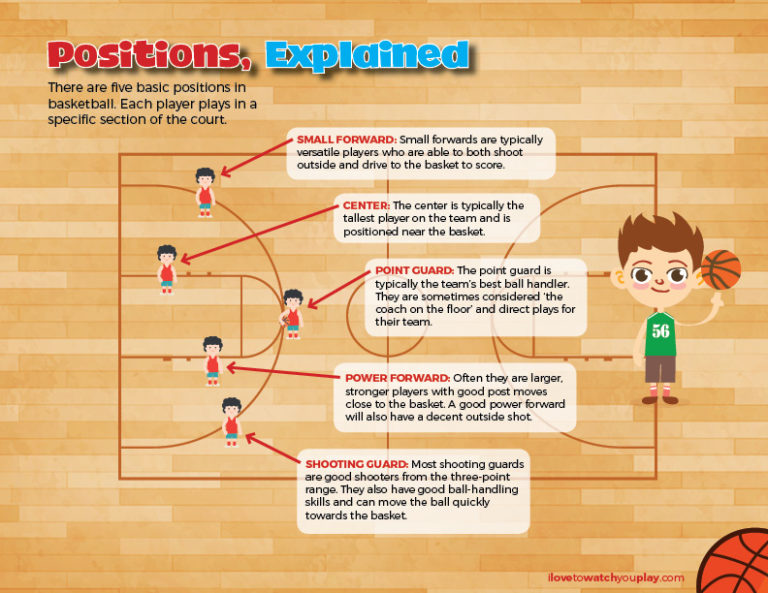

### BASKETBALL POSITIONS
A basketball team can have a lot of players, but only five can play in a game at any one time. Players in a basketball game have assigned basketball positions: center, power forward, small forward, point guard, and shooting guard.

Center

The center is the tallest player on each team, playing near the basket. On offense, the center tries to score on close shots and rebound. But on defense, the center tries to block opponents’ shots and rebound their misses.

Power Forward

The power forward does many of the things a center does, playing near the basket while rebounding and defending taller players. But power forwards also take longer shots than centers.

Small Forward

The small forward plays against small and large players. They roam all over on the court. Small forwards can score from long shots and close ones.

Point Guard

The point guard runs the offense and usually is the team’s best dribbler and passer. The point guard defends the opponent’s point guard and tries to steal the ball.

Shooting Guard

The shooting guard is usually the team’s best shooter. The shooting guard can make shots from long distance and also is a good dribbler.

### Players Dataset Pre-Processing

In [3]:
#the target feature is "mvp".  It is a binary feature where 1 = League MVP and 0 = not League MVP.
#examining the coeficient values in the EDA heat maps I selected the following features

features_list = ['player', 'pos', 'tm', 'ft', 'trb', 'fg', 'ast', 'season', 'mvp']

#the other features had high correlations with the other features and could reduce model objectivity
#the created 'allstar' feature was not highly correlated, but is identified in the NBA around the same time as the MVP is known

In [4]:
#create the pre-processing dataset as prep_players
prep_players = players.loc[:, features_list]
print(prep_players.shape)
prep_players.columns

(29567, 9)


Index(['player', 'pos', 'tm', 'ft', 'trb', 'fg', 'ast', 'season', 'mvp'], dtype='object')

In [5]:
#check for null values remaining from wrangling and EDA steps if the DSM.
prep_players.isnull().sum()

player      0
pos         0
tm          0
ft          0
trb       312
fg          0
ast         0
season      0
mvp         0
dtype: int64

In [6]:
#the total rebounds (trb) stat came to the NBA in 1950-1951 season (1951 in dataset).  The Null values are all from 1950.
#for the purpose of modeling the MVP dropping the 1950 season is an acceptable approach.
#these 312 rows represent 1.05523% of the total data, close enough to the 1% benchmark for a fair statistical based decision.

print(prep_players.shape)
trb_1950 = prep_players.loc[prep_players['season'] == 1950, :]
print(trb_1950.shape)

#drop the 1950 season and check row count and null values are correct
prep_players.drop(trb_1950.index, inplace=True)
print(prep_players.shape)
prep_players.isnull().sum()

(29567, 9)
(312, 9)
(29255, 9)


player    0
pos       0
tm        0
ft        0
trb       0
fg        0
ast       0
season    0
mvp       0
dtype: int64

In [7]:
prep_players.dtypes

player     object
pos        object
tm         object
ft          int64
trb       float64
fg          int64
ast         int64
season      int64
mvp       float64
dtype: object

In [8]:
#create dummy features for categorical variables
df_objects = prep_players.select_dtypes(include=['object'])
prep_players = pd.concat([prep_players.drop(df_objects, axis=1), pd.get_dummies(df_objects)], axis=1)

In [9]:
prep_players.head()

,ft,trb,fg,ast,season,mvp,player_A.C. Green,player_A.J. Bramlett,player_A.J. English,player_A.J. Green,...,tm_STL,tm_SYR,tm_TOR,tm_TOT,tm_TRI,tm_UTA,tm_VAN,tm_WAS,tm_WSB,tm_WSC
0,8,38.0,52,21,2024,0.0,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1,12,32.0,39,13,2024,0.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2,14.0,13,4,2024,0.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,116,327.0,266,150,2024,0.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,37,95.0,134,96,2024,0.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [10]:
#drop season from the modeling dataset. It was needed only to drop the trb null value rows earlier.
prep_players.drop(columns = 'season', inplace = True)

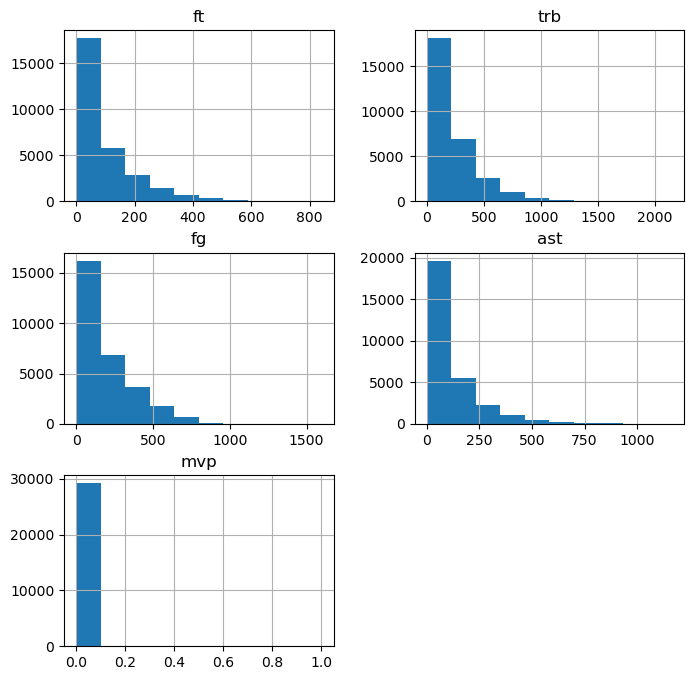

In [11]:
#visually examine each feature in prep_players for appropriate distribution patterns
prep_players.hist(figsize=(8, 8));

In [12]:
#scale the numerical features to prep for linear regression modeling
num_list = ['ft', 'trb', 'fg', 'ast']
df_num = prep_players.loc[:, num_list]

# compute required values
scaler = StandardScaler().set_output(transform="pandas")
model = scaler.fit(df_num)
scaled_df_num = model.transform(df_num)
 
# print scaled data
print(scaled_df_num)

             ft       trb        fg       ast
0     -0.796267 -0.796720 -0.737442 -0.675433
1     -0.759937 -0.823957 -0.807998 -0.735655
2     -0.850762 -0.905667 -0.949111 -0.803405
3      0.184652  0.515184  0.424019  0.295652
4     -0.532872 -0.537971 -0.292397 -0.110849
...         ...       ...       ...       ...
29250  0.820432  2.004127  0.928766  0.529013
29251  1.656029  0.161106  0.890774  0.536541
29252 -0.314890 -0.401787 -0.514920 -0.193654
29253  0.638780  1.082616 -0.124148  0.182735
29254  0.275477  0.478868 -0.286969  0.242957

[29255 rows x 4 columns]


In [13]:
#concatinate scaled_df_num and prep_players to create pre_players_scaled dataset with encoded categorical values
pre_players_scaled = pd.concat([prep_players.drop(df_num, axis=1), scaled_df_num], axis=1)

In [14]:
#examine the dataset for desired result
print(pre_players_scaled.shape)
pre_players_scaled.head()

(29255, 4631)


,mvp,player_A.C. Green,player_A.J. Bramlett,player_A.J. English,player_A.J. Green,player_A.J. Guyton,player_A.J. Hammons,player_A.J. Lawson,player_A.J. Price,player_A.J. Wynder,...,tm_TRI,tm_UTA,tm_VAN,tm_WAS,tm_WSB,tm_WSC,ft,trb,fg,ast
0,0.0,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,-0.796267,-0.796720,-0.737442,-0.675433
1,0.0,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,-0.759937,-0.823957,-0.807998,-0.735655
2,0.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,-0.850762,-0.905667,-0.949111,-0.803405
3,0.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,0.184652,0.515184,0.424019,0.295652
4,0.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,-0.532872,-0.537971,-0.292397,-0.110849


In [15]:
#output pre_players_scaled data sets for future use
pre_players_scaled.to_csv('preprocessed_nba_players.csv', index=False)

### Model 1: Logistic Regression

In [16]:
#split the data into training and test sets. Shuffle and do not stratify.
X = pre_players_scaled.drop('mvp', axis = 1).values
y = pre_players_scaled['mvp'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

In [17]:
#response variable is boolean and not continuous.  Use Logistic Regression for first model.

#train the Logistic Regression model
model = LogisticRegression (random_state=10)
model.fit(X_train, y_train)

import warnings
warnings.filterwarnings('ignore')

#evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy {:.2f}%".format(accuracy*100))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy 99.81%
Confusion Matrix:
 [[5840    0]
 [  11    0]]

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5840
         1.0       0.00      0.00      0.00        11

    accuracy                           1.00      5851
   macro avg       0.50      0.50      0.50      5851
weighted avg       1.00      1.00      1.00      5851



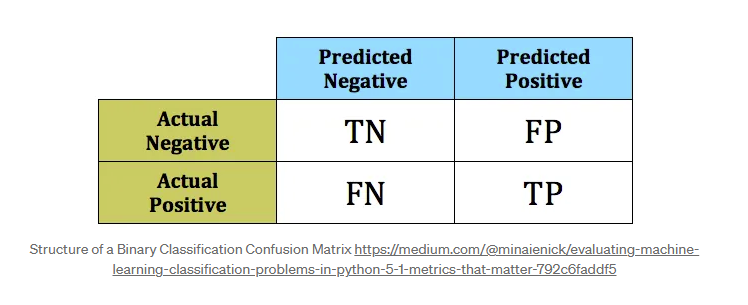

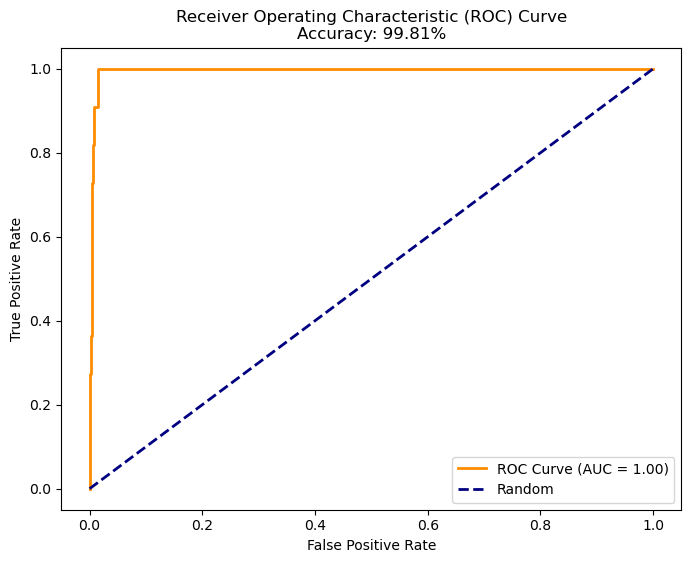

In [18]:
# Plot ROC Curve
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
 
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve\nAccuracy: {:.2f}%'.format(
    accuracy * 100))
plt.legend(loc="lower right")
plt.show()

#### Conclusions:  LogisticRegression is extremely accurate 99.81% at predicting the League MVP. This high of accuracy typicaly means the model overfit.

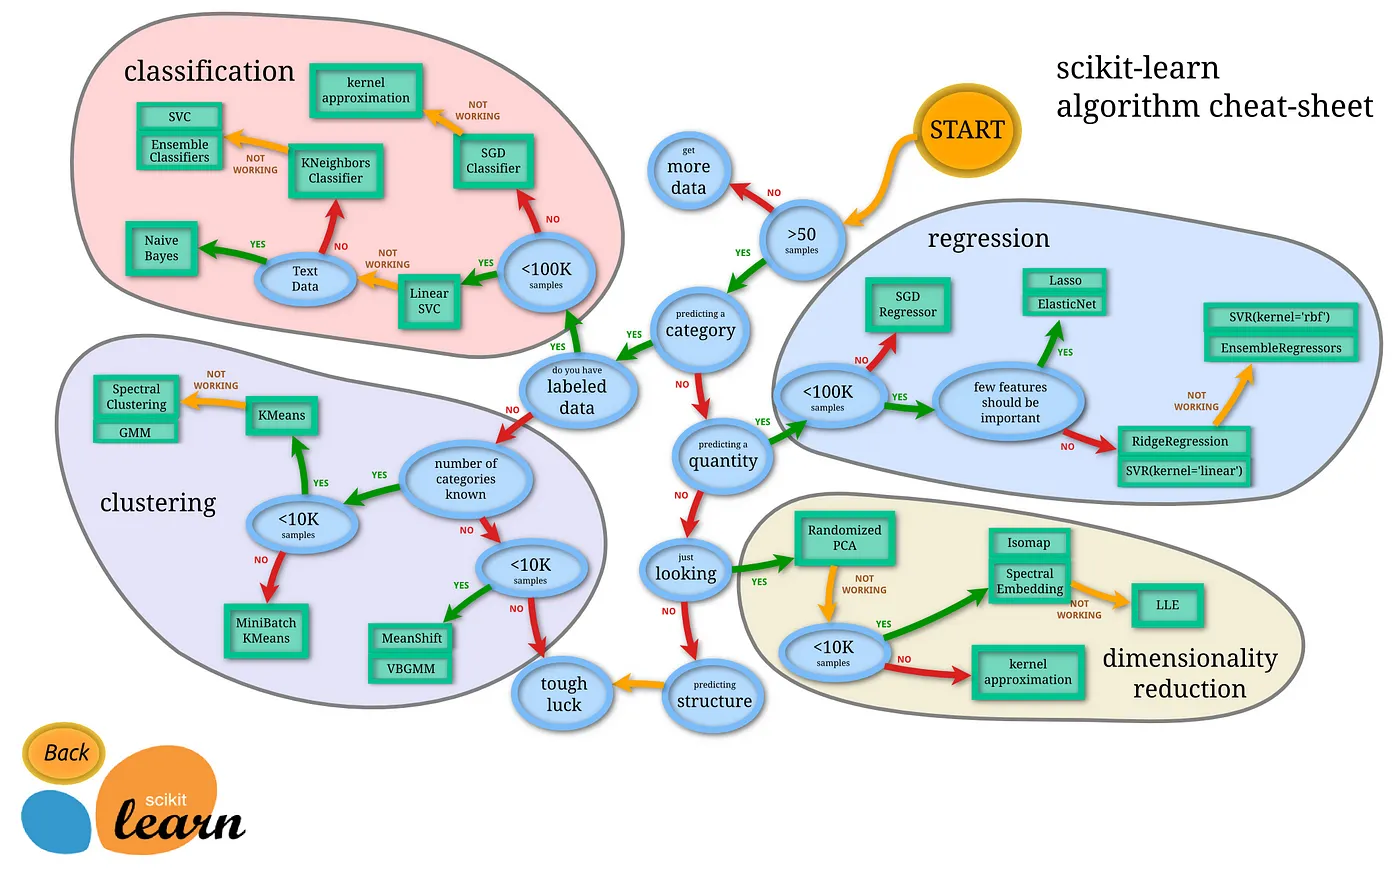

### Model 2: LinearSVC (as recommended by sckit learn chart above for labeled category with <100 samples)

In [19]:
#split the data into training and test sets. Shuffle and do not stratify.
X = pre_players_scaled.drop('mvp', axis = 1).values
y = pre_players_scaled['mvp'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [20]:
#train the SVC model
model2 = LinearSVC(verbose=0)
print(model2)
model2.fit(X_train, y_train)
score = model2.score(X_train, y_train)
print("Training Score: ", score)

import warnings
warnings.filterwarnings('ignore')

#evaluate the SVC model
y_pred = model2.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


LinearSVC()
Training Score:  0.997863613057597
Confusion Matrix:
 [[5839    2]
 [   9    1]]

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5841
         1.0       0.33      0.10      0.15        10

    accuracy                           1.00      5851
   macro avg       0.67      0.55      0.58      5851
weighted avg       1.00      1.00      1.00      5851



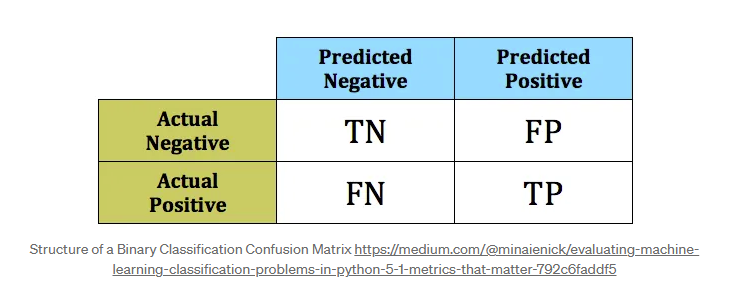

#### Conclusions:  LinearSVC is extremely accurate 100% at predicting the League MVP. This high accuracy typicaly means the model overfit.

### The LinearSVC model is the better model for this prediction.  Additional work should be done with feature selection to discover why the model is so accurate.